In [2]:
!pip install -q ultralytics


In [3]:
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [16]:
import cv2
import os
import random
import matplotlib.pyplot as plt

*YOLOv8s is the smallest and fastest variant of the YOLOv8 (You Only Look Once) object detection model developed by Ultralytics. It is optimized for real-time performance with minimal computational resources, making it ideal for edge devices and speed-critical applications. Despite its compact size, YOLOv8s delivers competitive accuracy for tasks like object detection, classification, and segmentation.*


In [4]:
model = YOLO("yolov8s.pt")  

model.train(
    data="/kaggle/input/ships-in-aerial-images/ships-aerial-images/data.yaml",  
    epochs=50,
    imgsz=640,
    batch=16,
    name="yolov8_ship_detector",
    project="/kaggle/working"
)


100%|██████████| 21.5M/21.5M [00:00<00:00, 163MB/s]


Ultralytics 8.3.134 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/input/ships-in-aerial-images/ships-aerial-images/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolov8_ship_detector, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=10

100%|██████████| 755k/755k [00:00<00:00, 17.8MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 74.3MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 1.3±1.5 ms, read: 2.9±2.1 MB/s, size: 19.7 KB)


train: Scanning /kaggle/input/ships-in-aerial-images/ships-aerial-images/train/labels... 9697 images, 351 backgrounds, 2 corrupt: 100%|██████████| 9697/9697 [00:52<00:00, 186.07it/s]

train: /kaggle/input/ships-in-aerial-images/ships-aerial-images/train/images/1__20180714_180427_1029__-118-20071740708637_33-73029905538088_png.rf.330efa80ecbf49d6ceac7071288d64b4.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0249]
train: /kaggle/input/ships-in-aerial-images/ships-aerial-images/train/images/1__20180714_180427_1029__-118-21100741654266_33-732092454738826_png.rf.7243f2b58b505e51950850f4b26081ba.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0079]


WARNING ⚠️ train: Cache directory /kaggle/input/ships-in-aerial-images/ships-aerial-images/train is not writeable, cache not saved.
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 709, len(boxes) = 19454. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3.4±2.7 MB/s, size: 16.7 KB)


val: Scanning /kaggle/input/ships-in-aerial-images/ships-aerial-images/valid/labels... 2165 images, 68 backgrounds, 0 corrupt: 100%|██████████| 2165/2165 [00:11<00:00, 189.39it/s]


WARNING ⚠️ val: Cache directory /kaggle/input/ships-in-aerial-images/ships-aerial-images/valid is not writeable, cache not saved.
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 172, len(boxes) = 3720. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
Plotting labels to /kaggle/working/yolov8_ship_detector/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to /kaggle/working/yolov8_ship_detector
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      4.91G      1.824      2.053      1.625         21        640: 100%|██████████| 606/606 [02:49<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 68/68 [00:21<00:00,  3.23it/s]


                   all       2165       3720      0.374      0.263      0.218     0.0899

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      5.48G      1.902      1.866      1.668         25        640: 100%|██████████| 606/606 [02:48<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 68/68 [00:19<00:00,  3.45it/s]


                   all       2165       3720      0.389      0.249      0.231     0.0997

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      5.48G      1.837      1.799      1.622         32        640: 100%|██████████| 606/606 [02:46<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 68/68 [00:19<00:00,  3.51it/s]


                   all       2165       3720      0.374      0.284      0.268       0.13

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      5.48G      1.776      1.682      1.575         21        640: 100%|██████████| 606/606 [02:45<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 68/68 [00:19<00:00,  3.53it/s]


                   all       2165       3720      0.443      0.302      0.297      0.134

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      5.48G      1.707       1.57      1.529         38        640: 100%|██████████| 606/606 [02:45<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 68/68 [00:19<00:00,  3.52it/s]


                   all       2165       3720      0.471      0.345      0.347      0.182

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      5.48G      1.648      1.495      1.483         37        640: 100%|██████████| 606/606 [02:45<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 68/68 [00:19<00:00,  3.49it/s]

                   all       2165       3720      0.529      0.347      0.376        0.2



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      5.48G      1.633      1.439      1.459         45        640: 100%|██████████| 606/606 [02:46<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 68/68 [00:19<00:00,  3.46it/s]


                   all       2165       3720      0.487      0.364      0.366      0.187

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      5.48G      1.589      1.394      1.449         38        640: 100%|██████████| 606/606 [02:45<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 68/68 [00:19<00:00,  3.50it/s]


                   all       2165       3720      0.533      0.361      0.379        0.2

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      5.48G      1.559      1.347      1.424         43        640: 100%|██████████| 606/606 [02:45<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 68/68 [00:19<00:00,  3.50it/s]


                   all       2165       3720      0.522       0.39      0.396      0.211

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      5.48G      1.549      1.328      1.413         27        640: 100%|██████████| 606/606 [02:45<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 68/68 [00:19<00:00,  3.50it/s]

                   all       2165       3720      0.538      0.402      0.405      0.225



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      5.48G      1.515      1.299      1.393         78        640: 100%|██████████| 606/606 [02:45<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 68/68 [00:19<00:00,  3.51it/s]

                   all       2165       3720      0.532      0.389      0.412      0.218



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      5.48G      1.507       1.28       1.39         39        640: 100%|██████████| 606/606 [02:45<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 68/68 [00:19<00:00,  3.51it/s]

                   all       2165       3720      0.485      0.348      0.386      0.214



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      5.48G      1.495      1.259      1.383         33        640: 100%|██████████| 606/606 [02:45<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 68/68 [00:19<00:00,  3.51it/s]


                   all       2165       3720      0.555      0.353      0.401      0.215

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      5.48G      1.478      1.227      1.365         41        640: 100%|██████████| 606/606 [02:45<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 68/68 [00:19<00:00,  3.48it/s]

                   all       2165       3720       0.56      0.441      0.437      0.244



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      5.48G      1.457      1.207      1.349         49        640: 100%|██████████| 606/606 [02:45<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 68/68 [00:19<00:00,  3.50it/s]

                   all       2165       3720      0.537      0.437      0.434      0.242



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      5.48G      1.446      1.199      1.346         33        640: 100%|██████████| 606/606 [02:45<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 68/68 [00:19<00:00,  3.50it/s]


                   all       2165       3720      0.571      0.422      0.435      0.246

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      6.07G      1.429      1.167      1.339         51        640: 100%|██████████| 606/606 [02:45<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 68/68 [00:19<00:00,  3.55it/s]

                   all       2165       3720      0.525       0.42      0.432      0.239



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      6.07G      1.436      1.178      1.338         23        640: 100%|██████████| 606/606 [02:45<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 68/68 [00:19<00:00,  3.48it/s]

                   all       2165       3720      0.561      0.428      0.449      0.254



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      6.07G      1.414      1.141      1.315         32        640: 100%|██████████| 606/606 [02:46<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 68/68 [00:19<00:00,  3.50it/s]


                   all       2165       3720      0.582      0.434      0.452      0.256

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      6.07G      1.414      1.145       1.32         38        640: 100%|██████████| 606/606 [02:45<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 68/68 [00:19<00:00,  3.50it/s]


                   all       2165       3720      0.559      0.449      0.456      0.257

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      6.07G      1.417      1.141      1.318         32        640: 100%|██████████| 606/606 [02:46<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 68/68 [00:19<00:00,  3.51it/s]

                   all       2165       3720      0.583      0.438       0.46      0.263



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      6.07G      1.377      1.098        1.3         20        640: 100%|██████████| 606/606 [02:46<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 68/68 [00:19<00:00,  3.52it/s]

                   all       2165       3720      0.591      0.448      0.469      0.272



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      6.07G      1.369      1.087      1.297         36        640: 100%|██████████| 606/606 [02:45<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 68/68 [00:19<00:00,  3.52it/s]


                   all       2165       3720      0.566      0.449      0.459      0.265

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      6.07G      1.366      1.095      1.296         39        640: 100%|██████████| 606/606 [02:45<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 68/68 [00:19<00:00,  3.50it/s]

                   all       2165       3720      0.577      0.435       0.47      0.274



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      6.07G      1.357      1.073      1.287         46        640: 100%|██████████| 606/606 [02:45<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 68/68 [00:19<00:00,  3.51it/s]


                   all       2165       3720      0.565       0.48      0.477      0.275

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      6.07G       1.35      1.075      1.288         23        640: 100%|██████████| 606/606 [02:45<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 68/68 [00:19<00:00,  3.52it/s]


                   all       2165       3720      0.589      0.447      0.474      0.276

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      6.07G      1.346      1.052      1.276         26        640: 100%|██████████| 606/606 [02:45<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 68/68 [00:19<00:00,  3.51it/s]

                   all       2165       3720      0.578      0.478      0.485      0.279



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      6.07G      1.335      1.047      1.276         26        640: 100%|██████████| 606/606 [02:45<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 68/68 [00:19<00:00,  3.55it/s]


                   all       2165       3720      0.591      0.457      0.487      0.288

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      6.07G       1.32      1.032      1.262         30        640: 100%|██████████| 606/606 [02:45<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 68/68 [00:19<00:00,  3.57it/s]


                   all       2165       3720      0.555      0.472      0.478      0.282

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      6.07G      1.323      1.034      1.259         31        640: 100%|██████████| 606/606 [02:45<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 68/68 [00:19<00:00,  3.51it/s]


                   all       2165       3720      0.595      0.449      0.479      0.285

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      6.07G      1.304      1.016      1.266         23        640: 100%|██████████| 606/606 [02:45<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 68/68 [00:19<00:00,  3.54it/s]


                   all       2165       3720      0.565      0.481      0.486       0.29

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      6.07G      1.306       1.01      1.251         43        640: 100%|██████████| 606/606 [02:45<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 68/68 [00:19<00:00,  3.46it/s]


                   all       2165       3720      0.548      0.465      0.475      0.285

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      6.07G      1.297      1.002      1.251         33        640: 100%|██████████| 606/606 [02:46<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 68/68 [00:19<00:00,  3.49it/s]


                   all       2165       3720      0.564       0.48      0.487      0.289

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      6.07G      1.289     0.9926      1.242         26        640: 100%|██████████| 606/606 [02:45<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 68/68 [00:18<00:00,  3.58it/s]


                   all       2165       3720      0.575      0.471      0.484      0.291

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      6.07G      1.274      0.974      1.244         42        640: 100%|██████████| 606/606 [02:45<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 68/68 [00:19<00:00,  3.56it/s]


                   all       2165       3720      0.595      0.474      0.491      0.292

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      6.07G      1.274     0.9693      1.235         73        640: 100%|██████████| 606/606 [02:45<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 68/68 [00:19<00:00,  3.54it/s]


                   all       2165       3720      0.601      0.481      0.491      0.295

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      6.07G      1.257     0.9612       1.23         35        640: 100%|██████████| 606/606 [02:45<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 68/68 [00:19<00:00,  3.54it/s]


                   all       2165       3720      0.583      0.475      0.488      0.295

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      6.07G       1.26     0.9492      1.223         49        640: 100%|██████████| 606/606 [02:45<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 68/68 [00:19<00:00,  3.54it/s]


                   all       2165       3720      0.576      0.491      0.494      0.296

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      6.07G      1.249     0.9472      1.222         48        640: 100%|██████████| 606/606 [02:45<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 68/68 [00:19<00:00,  3.55it/s]

                   all       2165       3720      0.564      0.493      0.493      0.296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      6.07G      1.243      0.928      1.215         30        640: 100%|██████████| 606/606 [02:45<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 68/68 [00:18<00:00,  3.59it/s]


                   all       2165       3720      0.579      0.487      0.495      0.297
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      6.07G      1.196     0.8603      1.176         17        640: 100%|██████████| 606/606 [02:44<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 68/68 [00:19<00:00,  3.54it/s]


                   all       2165       3720      0.596      0.488      0.501      0.302

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      6.07G      1.186     0.8397      1.171         16        640: 100%|██████████| 606/606 [02:44<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 68/68 [00:19<00:00,  3.53it/s]


                   all       2165       3720      0.588      0.491      0.504      0.303

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      6.07G      1.183     0.8264      1.172         45        640: 100%|██████████| 606/606 [02:44<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 68/68 [00:19<00:00,  3.55it/s]


                   all       2165       3720       0.58      0.499      0.504      0.303

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      6.07G      1.174     0.8273      1.163         14        640: 100%|██████████| 606/606 [02:44<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 68/68 [00:19<00:00,  3.57it/s]


                   all       2165       3720       0.59      0.495      0.507      0.306

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      6.07G      1.158     0.8117      1.156         45        640: 100%|██████████| 606/606 [02:44<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 68/68 [00:19<00:00,  3.57it/s]


                   all       2165       3720      0.604      0.498      0.511      0.309

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      6.07G      1.146     0.8006       1.15         22        640: 100%|██████████| 606/606 [02:44<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 68/68 [00:19<00:00,  3.55it/s]


                   all       2165       3720      0.603      0.499      0.511      0.307

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      6.07G      1.139      0.789      1.142         46        640: 100%|██████████| 606/606 [02:44<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 68/68 [00:19<00:00,  3.55it/s]


                   all       2165       3720      0.596      0.494      0.509      0.306

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      6.07G      1.132     0.7861      1.138         37        640: 100%|██████████| 606/606 [02:44<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 68/68 [00:18<00:00,  3.59it/s]


                   all       2165       3720      0.584        0.5       0.51      0.309

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      6.07G      1.125     0.7784      1.134         12        640: 100%|██████████| 606/606 [02:44<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 68/68 [00:19<00:00,  3.57it/s]

                   all       2165       3720      0.585      0.497      0.507      0.308



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      6.07G       1.12     0.7677      1.131         17        640: 100%|██████████| 606/606 [02:44<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 68/68 [00:19<00:00,  3.56it/s]


                   all       2165       3720      0.589      0.494      0.509      0.309

50 epochs completed in 2.576 hours.
Optimizer stripped from /kaggle/working/yolov8_ship_detector/weights/last.pt, 22.5MB
Optimizer stripped from /kaggle/working/yolov8_ship_detector/weights/best.pt, 22.5MB

Validating /kaggle/working/yolov8_ship_detector/weights/best.pt...
Ultralytics 8.3.134 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 68/68 [00:20<00:00,  3.39it/s]


                   all       2165       3720      0.589      0.495      0.509       0.31


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 0.2ms preprocess, 5.1ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to /kaggle/working/yolov8_ship_detector


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f1a7da2f690>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

**ERROR METRICS:**


###  **box\_loss (Localization Loss)**

*Measures how accurately the predicted bounding boxes match the ground truth boxes. It penalizes incorrect box coordinates (x, y, width, height).*


###  **cls\_loss (Classification Loss)**

*Indicates the error in classifying the detected objects. It's high when the model misclassifies or shows low confidence for the correct class.*



### **dfl\_loss (Distribution Focal Loss)**

*Used to refine bounding box regression by predicting continuous distributions instead of fixed points, improving precision in box localization.*



### **mAP50-95 (Mean Average Precision @ IoU 0.50:0.95)**

*The **average** detection precision across IoU thresholds from **0.50 to 0.95** (in 0.05 steps). It's the most comprehensive mAP score, used in COCO benchmarks.*



###  **mAP50 (Mean Average Precision @ IoU 0.50)**

*Simpler version of mAP that only considers detections with **IoU ≥ 0.50** as correct. It's easier to achieve and often used as a quick performance reference.*



### **mAP75 (Mean Average Precision @ IoU 0.75)**

*A stricter mAP metric requiring **IoU ≥ 0.75** for a detection to count as correct. Higher value indicates better localization precision.*

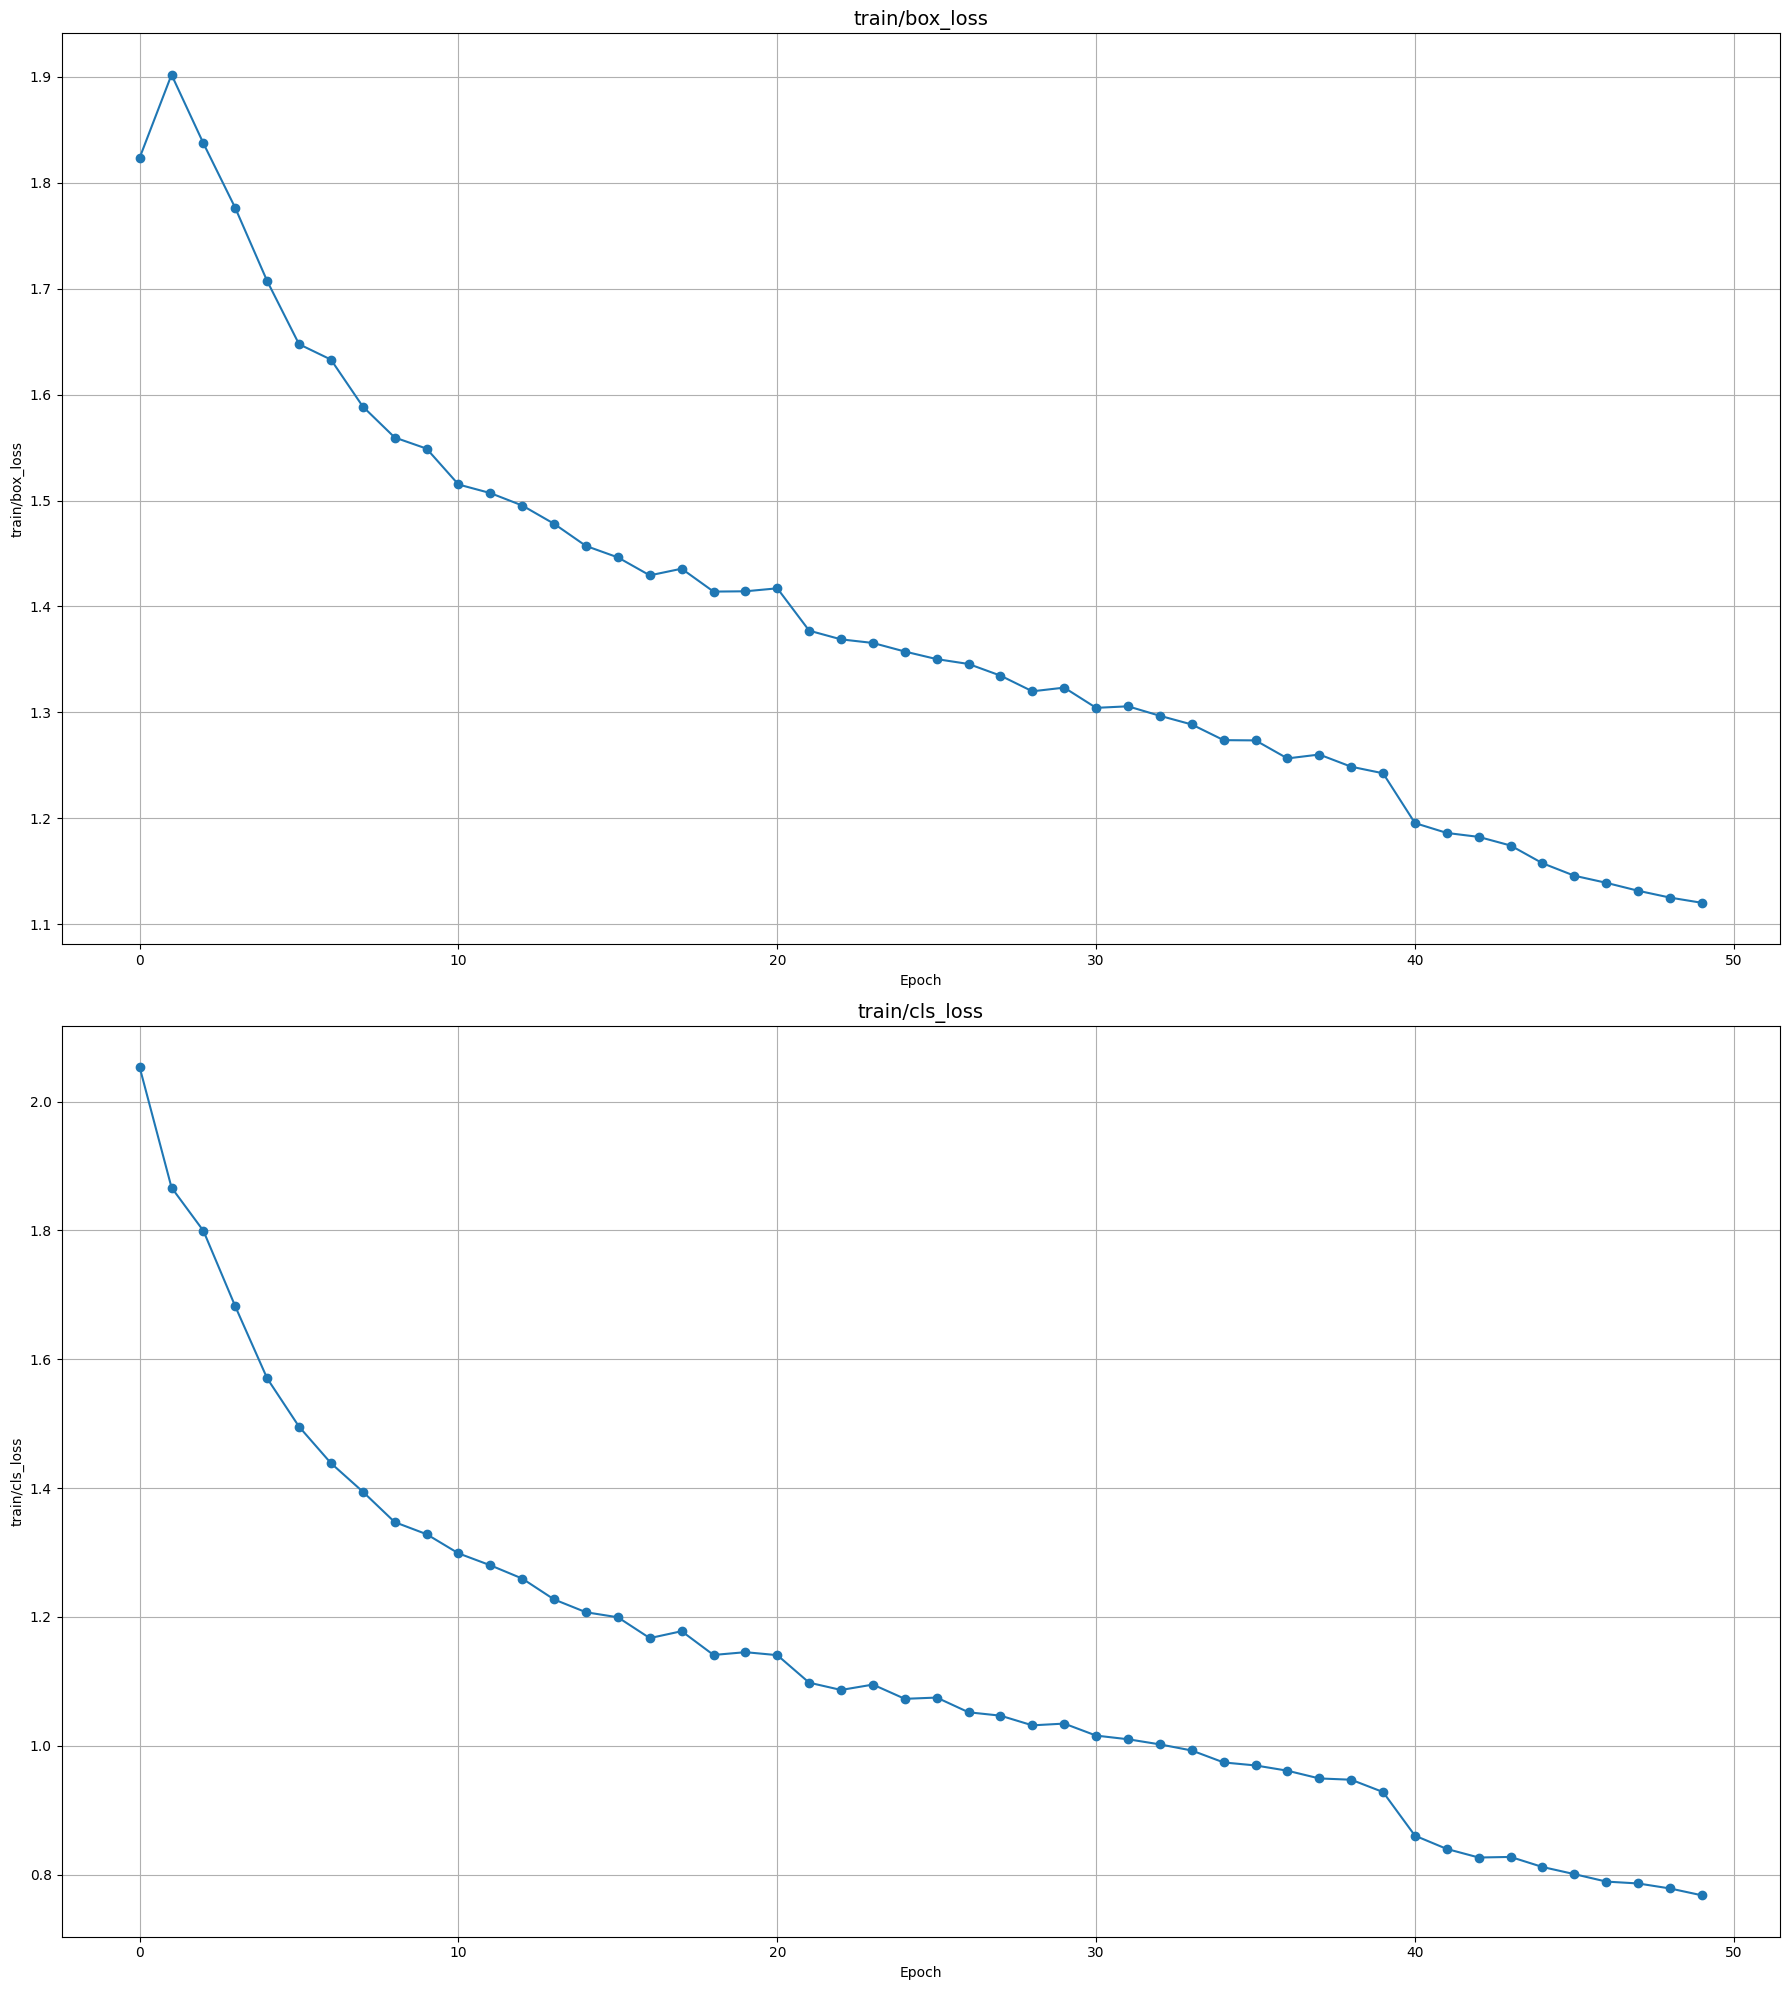

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure plots display inside the notebook
%matplotlib inline

# Load the results.csv
results_path = '/kaggle/working/yolov8_ship_detector/results.csv'  
df = pd.read_csv(results_path)
# Plotting all key metrics
metrics_to_plot = [
    'train/box_loss',
    'train/cls_loss'
]

plt.figure(figsize=(18, 20))
for i, metric in enumerate(metrics_to_plot):
    plt.subplot(len(metrics_to_plot), 1, i + 1)
    plt.plot(df[metric], marker='o')
    plt.title(metric, fontsize=14)
    plt.xlabel('Epoch')
    plt.ylabel(metric)
    plt.grid(True)

plt.tight_layout()
plt.show()


Ultralytics 8.3.134 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs
val: Fast image access ✅ (ping: 0.7±0.8 ms, read: 41.3±40.2 MB/s, size: 20.8 KB)


val: Scanning /kaggle/input/ships-in-aerial-images/ships-aerial-images/valid/labels... 2165 images, 68 backgrounds, 0 corrupt: 100%|██████████| 2165/2165 [00:03<00:00, 659.05it/s]

WARNING ⚠️ val: Cache directory /kaggle/input/ships-in-aerial-images/ships-aerial-images/valid is not writeable, cache not saved.
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 172, len(boxes) = 3720. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 136/136 [00:29<00:00,  4.62it/s]


                   all       2165       3720      0.593      0.493      0.509      0.309


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 0.3ms preprocess, 9.9ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to /kaggle/working/yolov8_ship_detector2


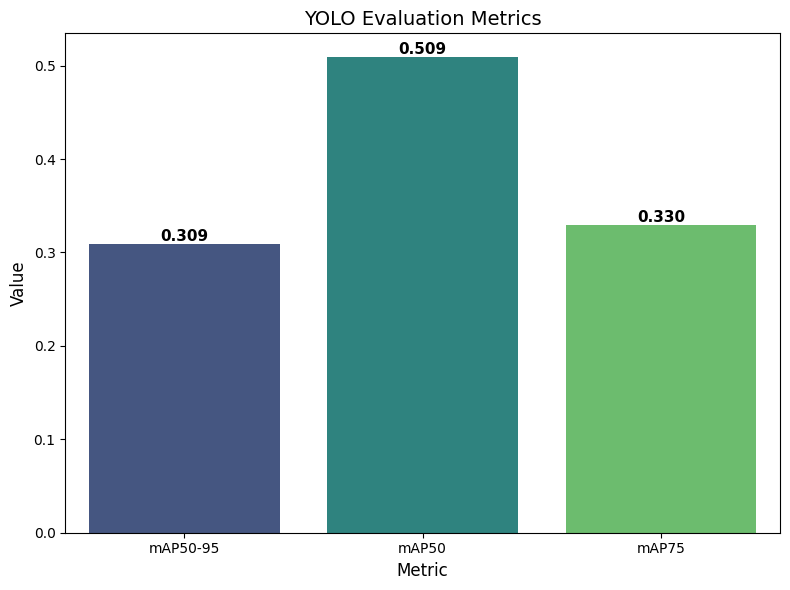

In [14]:
import seaborn as sns
# Ensure inline plots
%matplotlib inline



# Evaluate on the validation set
metrics = model.val()

# Create the barplot
ax = sns.barplot(
    x=['mAP50-95', 'mAP50', 'mAP75'],
    y=[metrics.box.map, metrics.box.map50, metrics.box.map75],
    palette='viridis'
)

# Set the title and axis labels
ax.set_title('YOLO Evaluation Metrics', fontsize=14)
ax.set_xlabel('Metric', fontsize=12)
ax.set_ylabel('Value', fontsize=12)

# Set figure size
fig = plt.gcf()
fig.set_size_inches(8, 6)

# Annotate values on bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.3f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=11, fontweight='bold')

# Show the plot
plt.tight_layout()
plt.show()

In [15]:
# Function to perform ship detections
def ship_detect(img_path):
    # Read the image
    img = cv2.imread(img_path)

    # Pass the image through the detection model and get the result
    detect_result = model(img)

    # Plot the detections (returns image with bounding boxes drawn)
    detect_img = detect_result[0].plot()

    # Convert BGR to RGB
    detect_img = cv2.cvtColor(detect_img, cv2.COLOR_BGR2RGB)

    return detect_img


0: 640x640 (no detections), 16.0ms
Speed: 3.2ms preprocess, 16.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 15.9ms
Speed: 3.1ms preprocess, 15.9ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 15.9ms
Speed: 2.4ms preprocess, 15.9ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 ship, 15.8ms
Speed: 2.1ms preprocess, 15.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 ship, 15.9ms
Speed: 1.7ms preprocess, 15.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 5 ships, 15.8ms
Speed: 2.5ms preprocess, 15.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 ship, 15.8ms
Speed: 2.4ms preprocess, 15.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 ship, 15.9ms
Speed: 2.1ms preprocess, 15.9ms inference, 1.4ms postprocess per image at sha

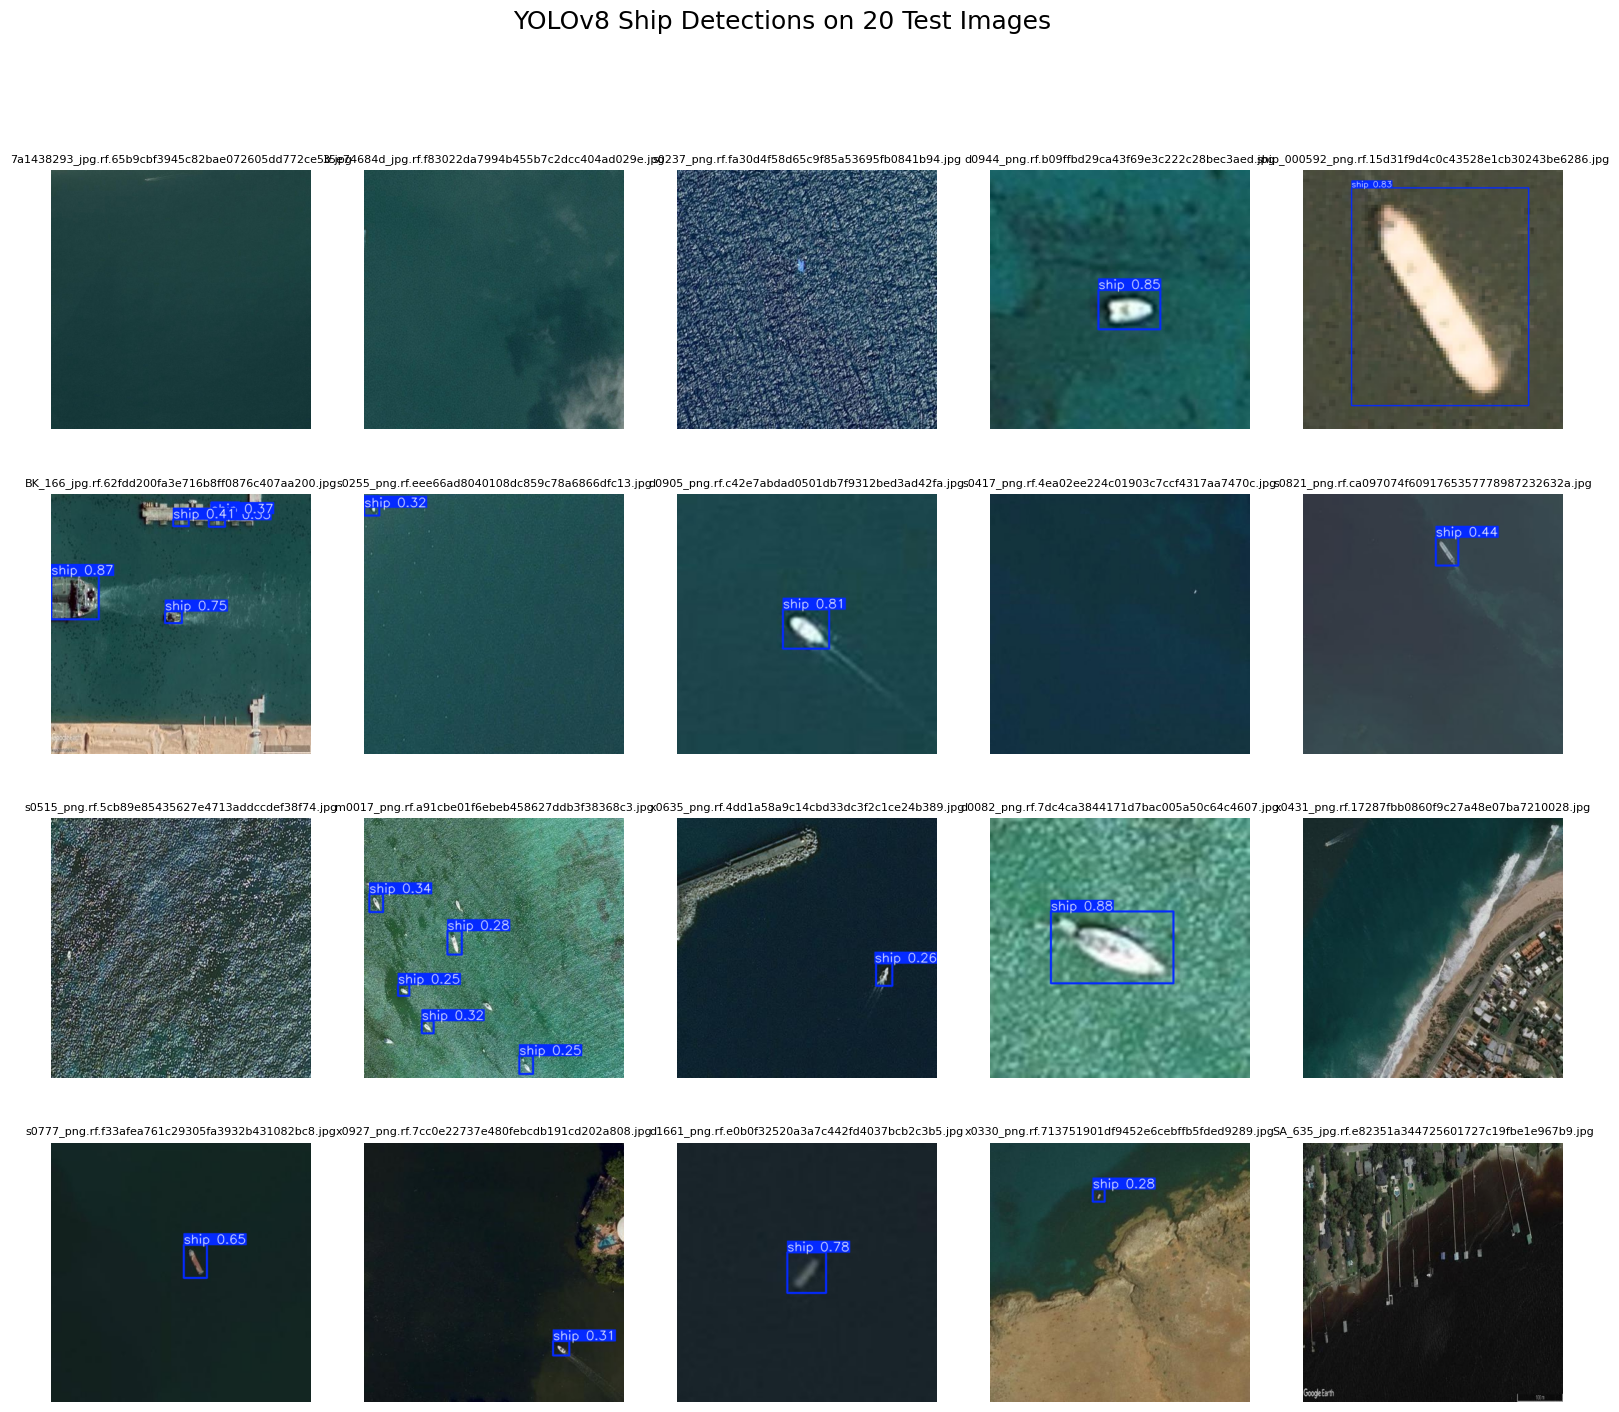

In [22]:
# Directory containing test images
image_dir = '/kaggle/input/ships-in-aerial-images/ships-aerial-images/test/images'

# Get image file names
image_files = os.listdir(image_dir)

# Randomly select 20 images
selected_images = random.sample(image_files, 20)

# Create subplot grid (4 rows x 5 columns)
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(20, 16))

# Flatten axes for easier indexing
axes = axes.flatten()

# Plot each image with detection
for i, img_file in enumerate(selected_images):
    # Full path of the image
    img_path = os.path.join(image_dir, img_file)
    
    # Perform detection
    detect_img = ship_detect(img_path)
    
    # Show image in subplot
    axes[i].imshow(detect_img)
    axes[i].set_title(img_file, fontsize=8)
    axes[i].axis('off')

# Turn off any extra subplots if fewer than 20
for j in range(len(selected_images), len(axes)):
    axes[j].axis('off')

# Adjust layout spacing
plt.subplots_adjust(wspace=0.05, hspace=0.25)
plt.suptitle('YOLOv8 Ship Detections on 20 Test Images', fontsize=18)
plt.show()
